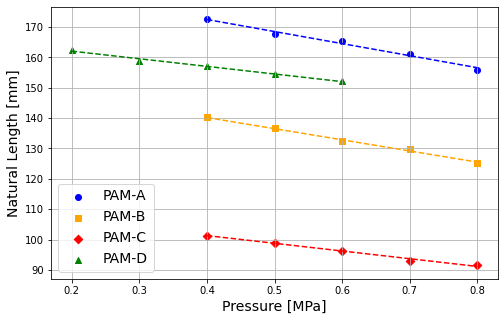

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSVファイルの読み込み
length_pressure_data =  pd.read_csv('C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\length_pressure\\length_pressure.csv')
# pressure範囲を0.2-0.8に限定
pressure_filtered = length_pressure_data[(length_pressure_data['Pressure'] >= 0.2) & 
                                         (length_pressure_data['Pressure'] <= 0.8)]

# 色とマーカーの定義
colors = ['b', 'orange', 'r', 'g']  # PAM-A, PAM-B, PAM-C, PAM-Dの色に対応
markers = ['o', 's', 'D', '^']  # PDFのマーカーの種類に対応
# グラフの作成
plt.figure(figsize=(8, 5))

# PAM-D Fitのpressure範囲は0.2-0.6
i = 3  # PAM-Dのインデックス
col = pressure_filtered.columns[i + 1]
mask = (pressure_filtered['Pressure'] >= 0.2) & (pressure_filtered['Pressure'] <= 0.6)
coefficients = np.polyfit(pressure_filtered['Pressure'][mask], pressure_filtered[col][mask], 1)
poly = np.poly1d(coefficients)
pressure_range = np.linspace(0.2, 0.6, 100)
plt.plot(pressure_range, poly(pressure_range), linestyle='--', color=colors[i])

# PAM-A, PAM-B, PAM-Cのフィット範囲は0.4-0.8
for i, col in enumerate(pressure_filtered.columns[1:4]):
    mask = (pressure_filtered['Pressure'] >= 0.4) & (pressure_filtered['Pressure'] <= 0.8)
    coefficients = np.polyfit(pressure_filtered['Pressure'][mask], pressure_filtered[col][mask], 1)
    poly = np.poly1d(coefficients)
    pressure_range = np.linspace(0.4, 0.8, 100)
    plt.plot(pressure_range, poly(pressure_range), linestyle='--', color=colors[i])

# 元のデータポイントをプロット
for i, col in enumerate(pressure_filtered.columns[1:]):
    plt.scatter(pressure_filtered['Pressure'], pressure_filtered[col], 
                marker=markers[i], color=colors[i], label=col)

# ラベルの設定
plt.xlabel('Pressure [MPa]',fontsize="14")
plt.ylabel('Natural Length [mm]',fontsize="14")
plt.legend(fontsize="14")
plt.grid(True)

# グラフの保存
save_path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\length_pressure\\length_pressure.pdf' 
plt.savefig(save_path, bbox_inches='tight')
plt.show()